In [27]:
import sys
sys.path.append("/richmondvol1/rusty/stompy")

In [28]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import os
import six
from stompy.plot import plot_wkb
import numpy as np
%matplotlib notebook

In [29]:
from stompy.grid import unstructured_grid
import stompy.model.delft.dflow_model as dfm

In [30]:
import bloom_common

In [31]:
scene_df=bloom_common.load_chl_scenes()

In [11]:
run_dir="run_wy2022_bloom_16layer_rotoscope_v01_20220810T1830"
#  def postproc(run_dir):

# tracers are uniform, weight, weight_value
map_ds=xr.open_dataset(os.path.join(run_dir,"dwaq_map.nc"))
g=unstructured_grid.UnstructuredGrid.read_ugrid(map_ds)


In [13]:
map_ds
BLOOMAlg01


<xarray.Dataset>
Dimensions:     (sub: 6, time: 49, layer: 16, face: 49996, node: 44184,
                 maxnode_per_face: 6, edge: 94194, node_per_edge: 2)
Coordinates:
  * sub         (sub) object 'BLOOMAlg01' 'BLOOMAlg02' ... 'SURF' 'TotalDepth'
  * time        (time) datetime64[ns] 2022-08-10T18:30:00 ... 2022-08-11T18:3...
Dimensions without coordinates: layer, face, node, maxnode_per_face, edge,
                                node_per_edge
Data variables: (12/15)
    t_sec       (time) int32 ...
    BLOOMAlg01  (time, layer, face) float32 ...
    BLOOMAlg02  (time, layer, face) float32 ...
    BLOOMAlg03  (time, layer, face) float32 ...
    LocalDepth  (time, layer, face) float32 ...
    SURF        (time, layer, face) float32 ...
    ...          ...
    node_y      (node) float64 4.151e+06 4.152e+06 ... 4.153e+06 4.153e+06
    face_node   (face, maxnode_per_face) int32 295 297 298 296 ... 43385 -1 -1
    edge_node   (edge, node_per_edge) int32 295 297 297 ... 43320 43449 43385
    bedlevel    (face) float32 -8.879e-06 -8.879e-06 ... -0.9631 -0.9619
    eta         (time, face) float32 ...
    sigma       (layer) float64 ...
Attributes:
    header:   DWAQ                                    n/a                    ...

<IPython.core.display.Javascript object>


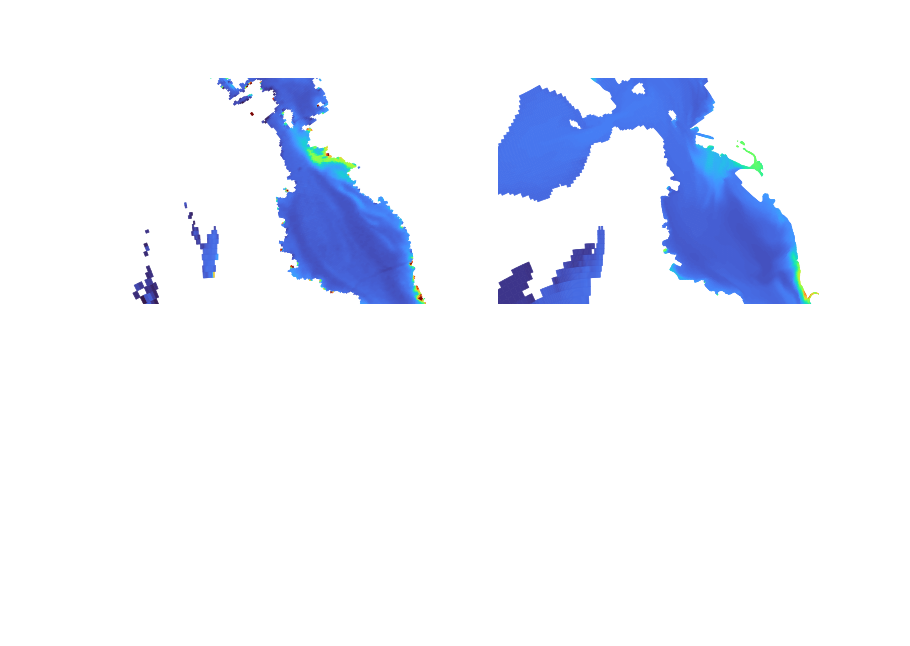

<xarray.DataArray 'time' ()>
array('2022-08-10T18:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2022-08-10T18:30:00
<xarray.DataArray 'time' ()>
array('2022-08-11T18:30:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2022-08-11T18:30:00


In [21]:
fig,axs=plt.subplots(2,2)
for ax in axs.ravel():
    ax.set_adjustable('datalim')
    ax.axis('off')


zoom=(529348.6949125907, 577019.3517870362, 4156965.4523581555, 4192441.2900321614)

# Top left: initial condition
uniform_var="BLOOMAlg01"
weight_var="BLOOMAlg02"
weight_value_var="BLOOMAlg03"

for tidx,ax in zip( [0,-1], axs[0,:]):
    snap=map_ds.isel(time=tidx,layer=0)

    weight=snap[weight_var].values
    invalid=weight<0.05
    value = snap[weight_value_var].values / snap[weight_var].values.clip(0.05)
    value[invalid]=np.nan
    coll=g.plot_cells( values=value, cmap='turbo',clim=[0,100], ax=ax,
                       edgecolor='face',lw=0.5)
    ax.axis(zoom)
    
    t=snap.time
    print(t)
    
# np.searchsorted(scene_df.acquisition_start, t.values)

In [25]:
np.searchsorted(scene_df.acquisition_start, t.values)

7

In [24]:
scene_df

,xml,acquisition_start,acquisition_stop
0,rs_chl/04b_log10/20220804_BandMath_BandMath.dim,2022-08-04 18:12:01,2022-08-04 18:12:20
1,rs_chl/04b_log10/20220805_BandMath_BandMath.dim,2022-08-05 18:47:14,2022-08-05 18:47:33
2,rs_chl/04b_log10/20220806_BandMath_BandMath.dim,2022-08-06 18:21:23,2022-08-06 18:21:42
3,rs_chl/04b_log10/20220807_BandMath_BandMath.dim,2022-08-07 17:55:28,2022-08-07 17:55:46
4,rs_chl/04b_log10/20220808_BandMath_BandMath.dim,2022-08-08 18:08:18,2022-08-08 18:08:37
5,rs_chl/04b_log10/20220809_BandMath_BandMath.dim,2022-08-09 18:43:32,2022-08-09 18:43:51
6,rs_chl/04b_log10/20220810_BandMath_BandMath.dim,2022-08-10 18:17:41,2022-08-10 18:18:00
7,rs_chl/04b_log10/20220811_BandMath_BandMath.dim,2022-08-11 18:30:30,2022-08-11 18:30:49
8,rs_chl/04b_log10/20220812_BandMath_BandMath.dim,2022-08-12 18:04:36,2022-08-12 18:04:54
9,rs_chl/04b_log10/20220813_BandMath_BandMath.dim,2022-08-13 18:39:52,2022-08-13 18:40:11


DFM Rotoscope Runs
--

Progress.

**Next step** is to lay the RS images back on the grid, plot
scatters and look at 
distributions of implied growth rate. For starters this will 
keep the ongoing assumption of vertically mixed.

It's clear that including some notion of vertical distribution will be 
necessary. It may have to be along the lines of bracketing rates based 
on nominal vertical distributions.

In [135]:
six.moves.reload_module(dfm)
roto_dir="rotodfm_v01"

# Choose a run, then figure out which scenes it matches
#run_dir=os.path.join(roto_dir,"run_20220806T1821_20220807T1755_v01")
#run_dir=os.path.join(roto_dir,"run_20220807T1755_20220808T1808_v01")
#run_dir=os.path.join(roto_dir,"run_20220808T1808_20220809T1843_v01")
#run_dir=os.path.join(roto_dir,"run_20220809T1843_20220810T1817_v00")
#run_dir=os.path.join(roto_dir,"run_20220810T1817_20220811T1830_v00")
#run_dir=os.path.join(roto_dir,"run_20220811T1830_20220812T1804_v00")
run_dir=os.path.join(roto_dir,"run_20220812T1804_20220813T1839_v00")
model=dfm.DFlowModel.load(run_dir)

In [136]:
map_ds=model.map_dataset()

INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Remo

In [137]:
poly=map_ds.grid.boundary_polygon()

INFO:join_features:0 open strings, 16 simple polygons
INFO:join_features:Building index
INFO:UnstructuredGrid:Warning, boundary_polygon() failed using edges!  Trying polygon union method


<IPython.core.display.Javascript object>


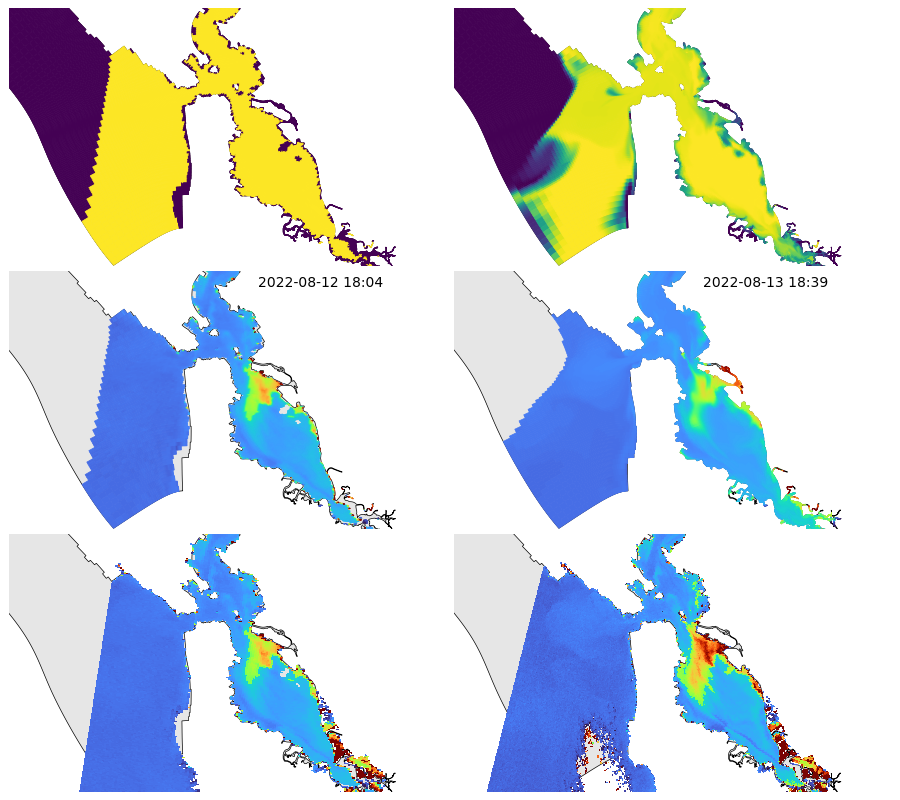

In [138]:
fig,axs=plt.subplots(3,2,figsize=(9,8))
fig.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01,
                    hspace=0.02,wspace=0.02)
for ax in axs.ravel():
    ax.set_adjustable('datalim')
    ax.axis('off')


zoom=(529348.6949125907, 577019.3517870362, 4156965.4523581555, 4192441.2900321614)

# Top left: initial condition
uniform_var=None
weight_var="weight0"
weight_value_var="wvalue0"
layer_kw=dict(laydim=-1) # dfm surface

chl_clim=[0,100]
for col,tidx in enumerate([0,-1]):
    snap=map_ds.isel(time=tidx,**layer_kw)
    weight=snap[weight_var].values
    min_weight=0.0001
    invalid=weight<min_weight
    value = snap[weight_value_var].values / np.maximum(weight,min_weight)
    value[invalid]=np.nan

    ax=axs[0,col]
    coll=map_ds.grid.plot_cells(values=weight, cmap='viridis',clim=[0,1], ax=ax,
                                edgecolor='face',lw=0.5)

    ax=axs[1,col]
    coll=map_ds.grid.plot_cells(values=value, cmap='turbo',clim=chl_clim, ax=ax,
                                edgecolor='face',lw=0.5)

    t=snap.time
    t_str=t.dt.strftime('%Y-%m-%d %H:%M').item()
    ax.text(0.57, 0.98,t_str,va='top',transform=ax.transAxes)
    
    # And the corresponding RS data
    scene_idx=np.searchsorted(scene_df.acquisition_start, t.values)
    ax=axs[2,col]
    xyz=bloom_common.load_scene_utm(scene_df.xml.values[scene_idx],ravel=False)
    coll=bloom_common.plot_xyz(xyz,ax=ax,cmap='turbo')
    coll.set_clim(chl_clim)
    ax.set_aspect(1.0)

    for ax in axs[:,col]:
        plot_wkb.plot_wkb(poly,fc='0.9',ec='k',lw=0.5,zorder=-1,ax=ax)
        ax.axis(zoom)


In [ ]:
# restart data is not getting updated.
# is the MDU pointing to the correct files? no. 
# not the global mdu either.

In [52]:
map_ds.close()


In [139]:
map_ds.dss[0]


<xarray.Dataset>
Dimensions:                      (nmesh2d_EnclosurePoints: 689,
                                  nmesh2d_EnclosureInstance: 1,
                                  nmesh2d_EnclosureParts: 1, nNetNode: 2883,
                                  nNetLink: 6354, nNetLinkPts: 2,
                                  nNetElem: 3472, nNetElemMaxNode: 6,
                                  nNetLinkContourPts: 4, nBndLink: 713,
                                  nFlowElem: 3472, nFlowElemContourPts: 6,
                                  nFlowLink: 5642, nFlowLinkPts: 2, time: 3,
                                  laydim: 16, wdim: 17)
Coordinates:
    NetNode_x                    (nNetNode) float64 5.809e+05 ... 5.816e+05
    NetNode_y                    (nNetNode) float64 4.151e+06 ... 4.153e+06
    FlowElem_xcc                 (nFlowElem) float64 ...
    FlowElem_ycc                 (nFlowElem) float64 ...
    FlowLink_xu                  (nFlowLink) float64 ...
    FlowLink_yu                  (nFlowLink) float64 ...
  * time                         (time) datetime64[ns] 2022-08-12T18:04:00 .....
    LayCoord_cc                  (laydim) float64 ...
    LayCoord_w                   (wdim) float64 ...
Dimensions without coordinates: nmesh2d_EnclosurePoints,
                                nmesh2d_EnclosureInstance,
                                nmesh2d_EnclosureParts, nNetNode, nNetLink,
                                nNetLinkPts, nNetElem, nNetElemMaxNode,
                                nNetLinkContourPts, nBndLink, nFlowElem,
                                nFlowElemContourPts, nFlowLink, nFlowLinkPts,
                                laydim, wdim
Data variables: (12/66)
    mesh2d_enc_x                 (nmesh2d_EnclosurePoints) float64 ...
    mesh2d_enc_y                 (nmesh2d_EnclosurePoints) float64 ...
    mesh2d_enc_node_count        (nmesh2d_EnclosureInstance) int32 ...
    mesh2d_enc_part_node_count   (nmesh2d_EnclosureParts) int32 ...
    mesh2d_enc_interior_ring     (nmesh2d_EnclosureParts) int32 ...
    mesh2d_enclosure_container   float32 ...
    ...                           ...
    vicwwu                       (time, nFlowLink, wdim) float64 ...
    tureps1                      (time, nFlowLink, wdim) float64 ...
    windx                        (time, nFlowElem) float64 ...
    windy                        (time, nFlowElem) float64 ...
    windxu                       (time, nFlowLink) float64 ...
    windyu                       (time, nFlowLink) float64 ...
Attributes:
    institution:    Deltares
    references:     http://www.deltares.nl
    source:         Deltares, D-Flow FM Version 1.2.143.141645M, Mar 20 2023,...
    history:        Created on 2023-04-03T13:38:07-0700, D-Flow FM
    date_created:   2023-04-03T13:38:07-0700
    date_modified:  2023-04-03T13:38:07-0700
    Conventions:    UGRID-0.9